In [27]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import scipy.optimize

eps = 1e-6

def f1(x1, x2):
    return np.cos(x2 - 2) + x1

def f2(x1, x2):
    return np.sin(x1 + 0.5) - x2 + 2.9

def f(x):
    x1, x2 = x
    return f1(x1, x2),f2(x1, x2)

def df1_dx1(x1, x2):
    return 1
def df1_dx2(x1, x2):
    return np.sin(x2-2)*-1
def df2_dx1(x1, x2):
    return np.cos(x1+0.5)
def df2_dx2(x1, x2):
    return -1

def A(x1,x2):
    return np.array([[df1_dx1(x1, x2),df1_dx2(x1, x2)], [df2_dx1(x1, x2), df2_dx2(x1, x2)]])

In [28]:
def b (x1, x2):
    return np.array ([-f1(x1, x2), -f2(x1, x2)])

In [29]:
def Newton (x1,x2):
    x1_old = x1
    x2_old = x2
    n = 1
    root = np.linalg.solve(A(x1_old, x2_old), b(x1_old, x2_old))
    x1_new = x1_old + root[0]
    x2_new = x2_old + root[1]
    while np.linalg.norm([x1_new-x1_old, x2_new-x2_old], np.inf) > eps:
        x1_old = x1_new
        x2_old = x2_new
        root = np.linalg.solve(A(x1_old,x2_old),b(x1_old, x2_old))
        x1_new = x1_old + root[0]
        x2_new = x2_old + root[1]
        n = n + 1
    return [x1_new, x2_new], n

In [30]:
print ("Решение системы НУ, найденное посредством метода Ньютона: ", Newton(-1, 2)[0])
print ("Кол-во потребовавшихся итераций: ", Newton(-1, 2)[1])

Решение системы НУ, найденное посредством метода Ньютона:  [-0.8475922803272561, 2.5593649304284036]
Кол-во потребовавшихся итераций:  5


In [31]:
solve_function = scipy.optimize.fsolve(f, (-1,2), xtol=eps)
print("Решение найденное посредством встроенной функции: ", solve_function)

Решение найденное посредством встроенной функции:  [-0.84759228  2.55936493]


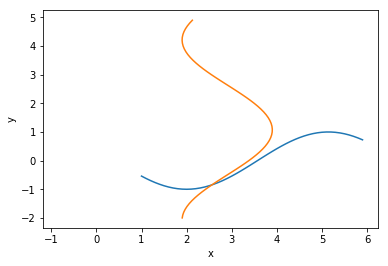

In [63]:
a = Newton(-1, 2)[0]
x = np.arange(1,6,0.1)
y = -1*np.cos(x-2)
plt.plot(x, y)

y = np.arange(-2, 5, 0.1)
x = 2.9 + np.sin(y+0.5)

plt.plot(x, y)
plt.plot(a[0], a[1], 'r')
plt.xlabel('x')
plt.ylabel('y')

plt.show()